In [42]:
import xarray
xarray.set_options(display_style="html")

import numpy as np
import pandas as pd
from pandas import (DataFrame, Series, Interval)
from pandas.arrays import IntervalArray
from xarray import DataArray

%load_ext watermark
%watermark -vdmp xarray

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2019-11-27 

CPython 3.7.3
IPython 7.9.0

xarray 0.14.1

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-36-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


# Interval

Pandas [IntervalDtype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.IntervalDtype.html#pandas-intervaldtype) extends [Numpy ndarray type](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html). **This is not an actual numpy dtype**, but a duck type. 

An [Interval](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Interval.html) is an immutable object implementing a bounded slice-like interval.

>Parameters:
>- left: *scalar*
>- right: *scalar*
>- closed: *string*, default to right 

In [43]:
s = Series(np.random.randint(1, 100, size=100))

In [47]:
r = pd.cut(s, np.arange(0, 101, 20))

In [52]:
r.sample(3)

14    (20, 40]
92     (0, 20]
97     (0, 20]
dtype: category
Categories (5, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]

# IntervalArray

In [17]:
IntervalArray.from_arrays([0, 1, 2], [1, 2, 3])

IntervalArray([(0, 1], (1, 2], (2, 3]],
              closed='right',
              dtype='interval[int64]')

In [16]:
IntervalArray.from_tuples(((0, 1), (1, 2), (2, 3)))

IntervalArray([(0, 1], (1, 2], (2, 3]],
              closed='right',
              dtype='interval[int64]')

In [14]:
IntervalArray.from_breaks([0, 1, 2, 3])

IntervalArray([(0, 1], (1, 2], (2, 3]],
              closed='right',
              dtype='interval[int64]')

In [18]:
intervals = IntervalArray.from_breaks([0, 1, 2, 3])

In [20]:
from sys import getsizeof

In [21]:
getsizeof(intervals)

56

In [26]:
intervals.take([1])

IntervalArray([(1, 2]],
              closed='right',
              dtype='interval[int64]')

In [27]:
intervals

IntervalArray([(0, 1], (1, 2], (2, 3]],
              closed='right',
              dtype='interval[int64]')

In [2]:
a = np.array([(1, 2), (2, 3)], dtype=[('lb', np.int32), ('ub', np.int32)])

In [3]:
da = DataArray(range(2), coords=[('x', IntervalArray([Interval(*v) for v in a]))])

In [4]:
da + da

<xarray.DataArray (x: 2)>
array([0, 2])
Coordinates:
  * x        (x) object (1, 2] (2, 3]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

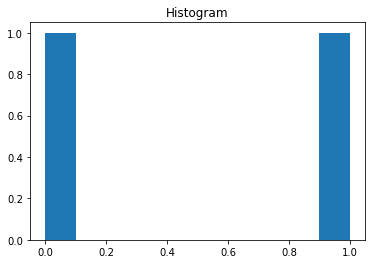

In [6]:
da.plot.hist()

In [7]:
i = Interval(left=0, right=5)

In [8]:
i.length

5

In [9]:
da.to_dict()

{'dims': ('x',),
 'attrs': {},
 'data': [0, 1],
 'coords': {'x': {'dims': ('x',),
   'attrs': {},
   'data': [Interval(1, 2, closed='right'), Interval(2, 3, closed='right')]}},
 'name': None}

In [10]:
da.to_masked_array()

masked_array(data=[0, 1],
             mask=[False, False],
       fill_value=999999)